<a href="https://colab.research.google.com/github/vicentew13/vicentew13/blob/Projects/Clasificador_Perros_y_Gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

#set de perros y gatos

datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTQJPUI/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [2]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

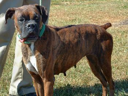
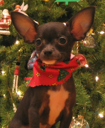
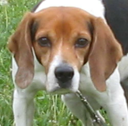
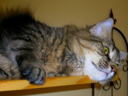
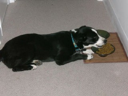

In [3]:
tfds.as_dataframe(datos['train'].take(5), metadatos)

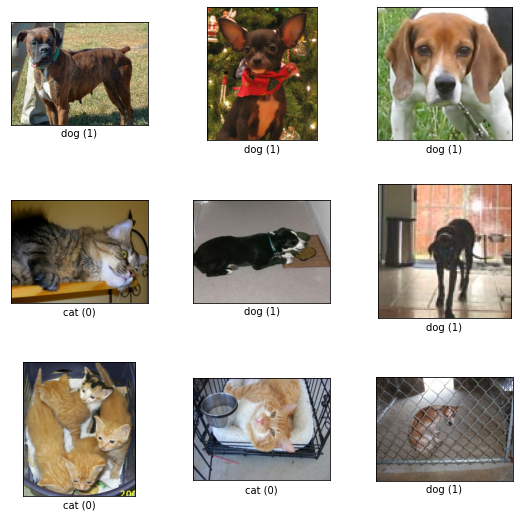

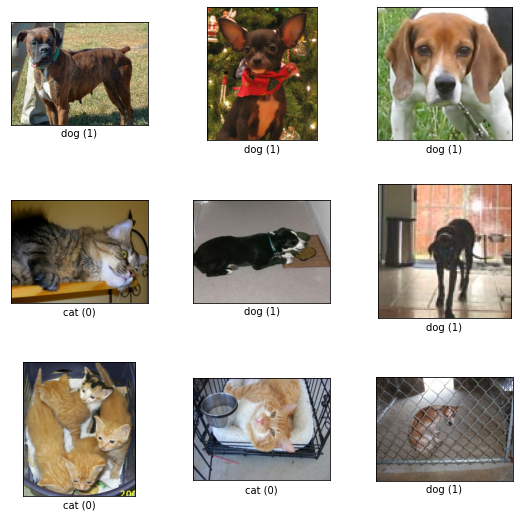

In [4]:
tfds.show_examples(datos['train'], metadatos)

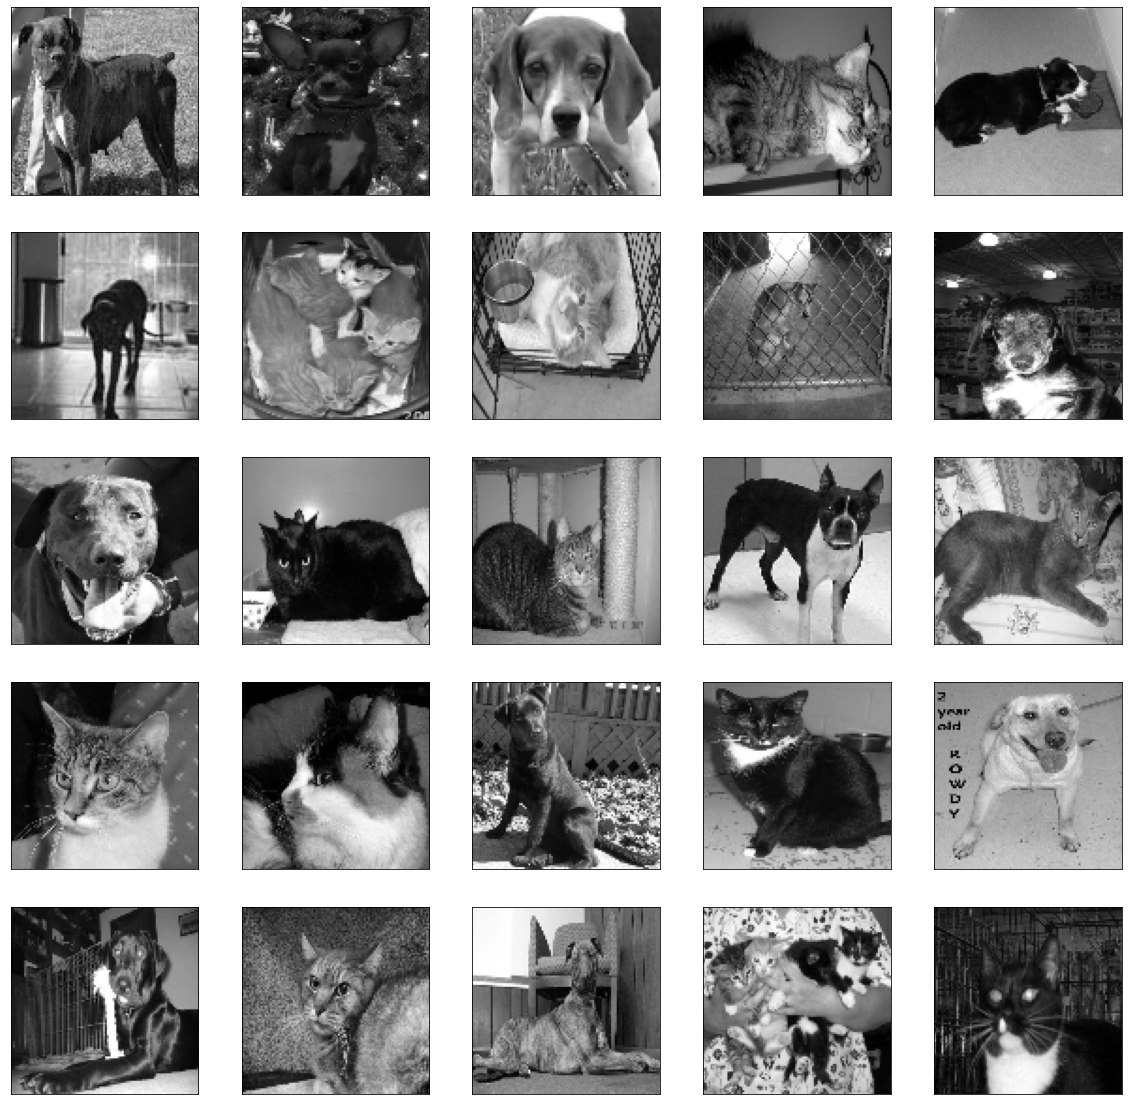

In [5]:
#tener control sobre lo que se ve usando matplotlib
import matplotlib.pyplot as plt
import cv2

tamano_img = 100
plt.figure(figsize=(20, 20))

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (tamano_img, tamano_img))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap= 'gray')


In [6]:
datos_entrenamiento = []

In [7]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #todos los datos
  imagen = cv2.resize(imagen.numpy(), (tamano_img, tamano_img))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(tamano_img, tamano_img, 1) #imagen de 100x100 con un canal de color
  datos_entrenamiento.append([imagen, etiqueta])


In [8]:
datos_entrenamiento[0] # 1 es perro, 0 es gato

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [9]:
len(datos_entrenamiento)

23262

In [10]:
X = [] #imagen de entrada
y = [] #etiqueta (perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)


In [11]:
import numpy as np

X = np.array(X).astype(float) / 255
y = np.array(y)

In [12]:
X[0]

array([[[0.94901961],
        [0.74509804],
        [0.41176471],
        ...,
        [0.74117647],
        [0.76470588],
        [0.56078431]],

       [[0.90196078],
        [0.50980392],
        [0.34509804],
        ...,
        [0.7372549 ],
        [0.70196078],
        [0.73333333]],

       [[0.66666667],
        [0.36470588],
        [0.32941176],
        ...,
        [0.51372549],
        [0.61960784],
        [0.65882353]],

       ...,

       [[0.43921569],
        [0.67843137],
        [0.64313725],
        ...,
        [0.55294118],
        [0.59607843],
        [0.46666667]],

       [[0.54901961],
        [0.59215686],
        [0.6745098 ],
        ...,
        [0.37647059],
        [0.58823529],
        [0.59607843]],

       [[0.36078431],
        [0.43921569],
        [0.65882353],
        ...,
        [0.17254902],
        [0.20392157],
        [0.18431373]]])

In [13]:
#modelo denso con una capa de entrada para todos los pixeles y dos capas densas de 150 neuronas cada una

modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid') #sigmoid devuelve valor siempre entre 0 y 1
])

#Modelo convolucional de 3 pares de capas convolucionales

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#iguaal al anterior pero con un dropout de 0.5 antes de la capa densa de neuronas de 250 en vez de 100

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import TensorBoard

In [16]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=50,
                callbacks=[tensorboardDenso]) #guarda los datos en un archivo que luego se puede ver con tensorboard

Epoch 1/50
618/618 [==============================] - 7s 8ms/step - loss: 0.7080 - accuracy: 0.5410 - val_loss: 0.6868 - val_accuracy: 0.5794
Epoch 2/50
618/618 [==============================] - 4s 6ms/step - loss: 0.6791 - accuracy: 0.5724 - val_loss: 0.6658 - val_accuracy: 0.5983
Epoch 3/50
618/618 [==============================] - 4s 6ms/step - loss: 0.6700 - accuracy: 0.5868 - val_loss: 0.6652 - val_accuracy: 0.5917
Epoch 4/50
618/618 [==============================] - 4s 7ms/step - loss: 0.6665 - accuracy: 0.5911 - val_loss: 0.6654 - val_accuracy: 0.6034
Epoch 5/50
618/618 [==============================] - 4s 7ms/step - loss: 0.6596 - accuracy: 0.6077 - val_loss: 0.6599 - val_accuracy: 0.6023
Epoch 6/50
618/618 [==============================] - 4s 6ms/step - loss: 0.6591 - accuracy: 0.6072 - val_loss: 0.6739 - val_accuracy: 0.5756
Epoch 7/50
618/618 [==============================] - 4s 7ms/step - loss: 0.6576 - accuracy: 0.6106 - val_loss: 0.6696 - val_accuracy: 0.5894
Epoch 

In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir logs #sobreajuste se aprende los datos de memoria de entrenamiento pero no puede trasladarlo a la prueba

<IPython.core.display.Javascript object>

In [19]:
tensorboardCNN = TensorBoard(log_dir='logs/CNN')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=50,
                callbacks=[tensorboardCNN])

Epoch 1/50
618/618 [==============================] - 24s 27ms/step - loss: 0.5991 - accuracy: 0.6624 - val_loss: 0.5253 - val_accuracy: 0.7284
Epoch 2/50
618/618 [==============================] - 16s 26ms/step - loss: 0.4628 - accuracy: 0.7800 - val_loss: 0.4434 - val_accuracy: 0.8023
Epoch 3/50
618/618 [==============================] - 16s 27ms/step - loss: 0.3975 - accuracy: 0.8185 - val_loss: 0.3993 - val_accuracy: 0.8212
Epoch 4/50
618/618 [==============================] - 16s 27ms/step - loss: 0.3465 - accuracy: 0.8433 - val_loss: 0.4188 - val_accuracy: 0.8097
Epoch 5/50
618/618 [==============================] - 16s 27ms/step - loss: 0.2895 - accuracy: 0.8740 - val_loss: 0.3637 - val_accuracy: 0.8395
Epoch 6/50
618/618 [==============================] - 17s 27ms/step - loss: 0.2331 - accuracy: 0.9022 - val_loss: 0.3720 - val_accuracy: 0.8418
Epoch 7/50
618/618 [==============================] - 16s 26ms/step - loss: 0.1739 - accuracy: 0.9289 - val_loss: 0.3879 - val_accuracy:

In [20]:
tensorboardCNN2 = TensorBoard(log_dir='logs/CNN2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=50,
                callbacks=[tensorboardCNN2])

Epoch 1/50
618/618 [==============================] - 18s 28ms/step - loss: 0.6350 - accuracy: 0.6269 - val_loss: 0.5833 - val_accuracy: 0.6914
Epoch 2/50
618/618 [==============================] - 17s 28ms/step - loss: 0.5216 - accuracy: 0.7435 - val_loss: 0.4861 - val_accuracy: 0.7691
Epoch 3/50
618/618 [==============================] - 17s 27ms/step - loss: 0.4612 - accuracy: 0.7809 - val_loss: 0.4307 - val_accuracy: 0.7951
Epoch 4/50
618/618 [==============================] - 17s 27ms/step - loss: 0.4182 - accuracy: 0.8068 - val_loss: 0.4002 - val_accuracy: 0.8212
Epoch 5/50
618/618 [==============================] - 17s 27ms/step - loss: 0.3806 - accuracy: 0.8268 - val_loss: 0.3832 - val_accuracy: 0.8312
Epoch 6/50
618/618 [==============================] - 17s 27ms/step - loss: 0.3394 - accuracy: 0.8508 - val_loss: 0.3548 - val_accuracy: 0.8441
Epoch 7/50
618/618 [==============================] - 17s 27ms/step - loss: 0.3008 - accuracy: 0.8704 - val_loss: 0.3703 - val_accuracy:

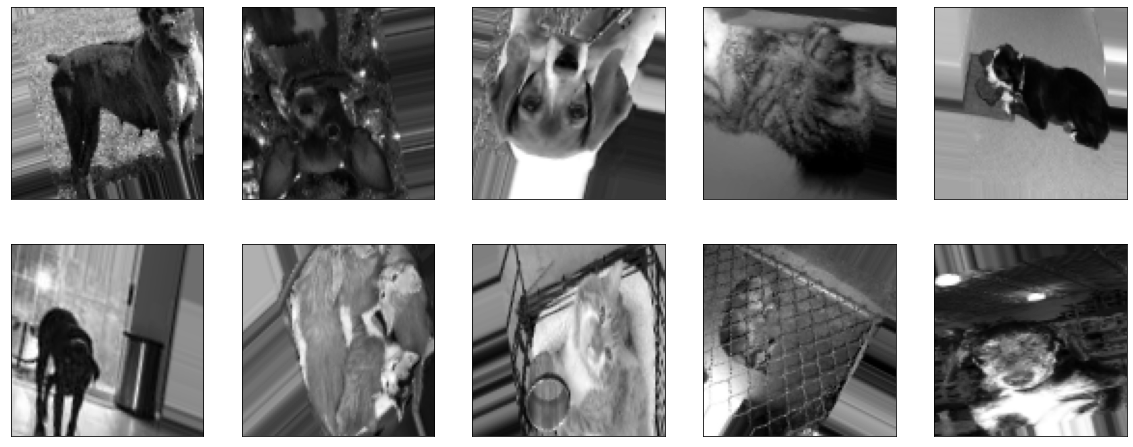

In [21]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [22]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [24]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [25]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [26]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=50, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

Epoch 1/50
616/616 [==============================] - 26s 41ms/step - loss: 0.7323 - accuracy: 0.5090 - val_loss: 0.7067 - val_accuracy: 0.5056
Epoch 2/50
616/616 [==============================] - 25s 40ms/step - loss: 0.6942 - accuracy: 0.5185 - val_loss: 0.6924 - val_accuracy: 0.5146
Epoch 3/50
616/616 [==============================] - 25s 40ms/step - loss: 0.6924 - accuracy: 0.5144 - val_loss: 0.6929 - val_accuracy: 0.5095
Epoch 4/50
616/616 [==============================] - 25s 41ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6850 - val_accuracy: 0.5500
Epoch 5/50
616/616 [==============================] - 25s 41ms/step - loss: 0.6926 - accuracy: 0.5111 - val_loss: 0.6858 - val_accuracy: 0.5387
Epoch 6/50
616/616 [==============================] - 25s 41ms/step - loss: 0.6916 - accuracy: 0.5180 - val_loss: 0.6919 - val_accuracy: 0.5101
Epoch 7/50
616/616 [==============================] - 25s 41ms/step - loss: 0.6919 - accuracy: 0.5119 - val_loss: 0.6930 - val_accuracy:

In [27]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=50, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

Epoch 1/50
616/616 [==============================] - 34s 55ms/step - loss: 0.6783 - accuracy: 0.5720 - val_loss: 0.6541 - val_accuracy: 0.6230
Epoch 2/50
616/616 [==============================] - 31s 51ms/step - loss: 0.6578 - accuracy: 0.6114 - val_loss: 0.6489 - val_accuracy: 0.6235
Epoch 3/50
616/616 [==============================] - 31s 50ms/step - loss: 0.6457 - accuracy: 0.6302 - val_loss: 0.6344 - val_accuracy: 0.6317
Epoch 4/50
616/616 [==============================] - 32s 52ms/step - loss: 0.6313 - accuracy: 0.6438 - val_loss: 0.6163 - val_accuracy: 0.6791
Epoch 5/50
616/616 [==============================] - 31s 50ms/step - loss: 0.6181 - accuracy: 0.6620 - val_loss: 0.5689 - val_accuracy: 0.7063
Epoch 6/50
616/616 [==============================] - 31s 49ms/step - loss: 0.6016 - accuracy: 0.6774 - val_loss: 0.5518 - val_accuracy: 0.7167
Epoch 7/50
616/616 [==============================] - 32s 52ms/step - loss: 0.5870 - accuracy: 0.6886 - val_loss: 0.5133 - val_accuracy:

In [28]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=50, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

Epoch 1/50
616/616 [==============================] - 33s 53ms/step - loss: 0.6775 - accuracy: 0.5699 - val_loss: 0.6670 - val_accuracy: 0.5825
Epoch 2/50
616/616 [==============================] - 31s 50ms/step - loss: 0.6552 - accuracy: 0.6122 - val_loss: 0.6720 - val_accuracy: 0.5722
Epoch 3/50
616/616 [==============================] - 30s 49ms/step - loss: 0.6432 - accuracy: 0.6314 - val_loss: 0.6179 - val_accuracy: 0.6567
Epoch 4/50
616/616 [==============================] - 32s 52ms/step - loss: 0.6328 - accuracy: 0.6411 - val_loss: 0.6028 - val_accuracy: 0.6690
Epoch 5/50
616/616 [==============================] - 31s 50ms/step - loss: 0.6162 - accuracy: 0.6660 - val_loss: 0.5618 - val_accuracy: 0.7165
Epoch 6/50
616/616 [==============================] - 33s 53ms/step - loss: 0.6106 - accuracy: 0.6645 - val_loss: 0.5785 - val_accuracy: 0.7024
Epoch 7/50
616/616 [==============================] - 31s 50ms/step - loss: 0.5999 - accuracy: 0.6772 - val_loss: 0.5478 - val_accuracy:

In [34]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 730), started 1:47:02 ago. (Use '!kill 730' to kill it.)

<IPython.core.display.Javascript object>

In [30]:
modeloCNN_AD.save('perros-gatos-cnn-ad.h5')

In [31]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.2 MB/s 


In [32]:
!mkdir carpeta_salida

In [33]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida